# Project: Seattle's Airbnb Market Analysis - CRISP-DM 

## 1. Business goal

As a future Airbnb host, I would like to understand the key factors that impact the price of a listing. The past history of listing demographics and calneder information along with the review infromtion has been generously made available by Kaggle is used for this project.

I would like to know the following aspects:

1. What are the key factors that impact the listing price?
2. What are the popular and least popular neghborhods?
3. Is there a sesonal pattern of price and availability of the listings?

All these imposed questions can be answered using the descriptive analytics and no Machine learing algorithms are used in this project.

### A brief layout of the analysis is as follows:

Datasets used: The datasets listings and calender provide enough information to answer aformentioned questions. 

#### Cleaning the listings dataset:

1. Columns with missing values are identifed and sorted to identify columns with 20% or more missing information.
2. Columns that do not provide any informtion related to the questions, columns with too much variation and no variation are gather by reviewing the categorical and numeric variables.
3. Columns identified in a and b are dropped
4. Columns with special characters are cleaned and a clean data set for exploratory analysis is prepared. 

#### Eploratory analysis: Answers to 1 and 2

##### Numeric variables:
Summary statistics, correlation matrix, and variable distributions are used to identify the factors that are realted to/impact price.

##### Categorical variables:
Bar plot for all caterorical varible with mean price are used to identify the catergorical variables that showed price variatin among groups


#### Cleaning and Exploratory analysis of the calender dataset: Answer  to 3

1. Special characters are replaced and appropriate variables are conveted to their specific data types
2. Date is decomposed to months, days, and week days to understand the seasonal patterns.


# PART I

## 1. Data Cleaning

### 1.1. Improting Libraries required for the Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### 1.2. Reading in the data provided

In [4]:
listings = pd.read_csv("data/listings.csv") 
calender = pd.read_csv("data/calendar.csv") 

In [5]:
print('Listings Shape: ',listings.shape)
print('Calender: ',calender.shape)

Listings Shape:  (3818, 92)
Calender:  (1393570, 4)


### 1.3. Celaning the dataset
#### 1.3.A. Identifying columns with missing values

In [6]:
(listings.isnull().sum()/listings.shape[0]*100).sort_values(ascending=False)


license                             100.000000
square_feet                          97.459403
monthly_price                        60.267156
security_deposit                     51.126244
weekly_price                         47.380828
notes                                42.063908
neighborhood_overview                27.029859
cleaning_fee                         26.977475
transit                              24.463070
host_about                           22.498690
host_acceptance_rate                 20.246202
review_scores_accuracy               17.234154
review_scores_checkin                17.234154
review_scores_value                  17.181771
review_scores_location               17.155579
review_scores_cleanliness            17.103195
review_scores_communication          17.050812
review_scores_rating                 16.946045
reviews_per_month                    16.422211
first_review                         16.422211
last_review                          16.422211
space        

In [7]:
percent_missing = listings.isnull().sum() * 100 / len(listings)
missing_value_listings = pd.DataFrame({'column_name': listings.columns,
                                 'percent_missing': percent_missing})
missing_value_listings.head(2)

,column_name,percent_missing
id,id,0.0
listing_url,listing_url,0.0


In [8]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


#### 1.3.B. Identifying columns with 20% or  missing information

In [9]:
missing_features = missing_value_listings[missing_value_listings['percent_missing']>=20]
missing_cols_20 = list(missing_features['column_name'])
missing_cols_20

['neighborhood_overview',
 'notes',
 'transit',
 'host_about',
 'host_acceptance_rate',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'license']

#### 1.3.C. Identifying columns that do not provide inforamation related to the imposed questions

In [10]:
#Columns with no variation or too much variation or high text content that will not be included in the analysis
less_impact_columns = ['listing_url', 'scrape_id', 'last_scraped','thumbnail_url',
'medium_url', 'picture_url', 'xl_picture_url','host_url',
'host_name','host_thumbnail_url','street','neighbourhood_group_cleansed',
'country_code', 'country','latitude', 'longitude','calendar_last_scraped',
'first_review','last_review','calculated_host_listings_count', 'reviews_per_month',
'name','description', 'experiences_offered', 'host_picture_url','host_has_profile_pic','city','state',
'smart_location','smart_location', 'requires_license', 'jurisdiction_names','space','has_availability', 'summary',
'host_verifications','host_neighbourhood', 'market']

#### 1.3.D. Cleaning the dataset by droping columns with 20% or missing information and columns that does not have an impact

In [11]:
len(missing_cols_20+less_impact_columns)

49

In [12]:
listing_clean = listings.drop(missing_cols_20+less_impact_columns, axis =1)
listing_clean.shape

(3818, 44)

In [13]:
#listing_clean.select_dtypes(['float64', 'int64']).columns.tolist()       

### 1.4. Converting string columns to numeric columns for exploratory purposes.

In [14]:
listing_clean['price'] = listing_clean['price'].str.replace('$','').str.replace(',','').astype('float')
listing_clean['extra_people'] = listing_clean['extra_people'].str.replace('$','').str.replace(',','').astype('float')
listing_clean['host_response_rate'] = listing_clean['host_response_rate'].str.replace('%','').astype('float')

# PART II    
## 1. What are the key factors that impact the listing price?
#### 1. A. Exploratory Analysis of numeric variables

In [15]:
np.transpose(listing_clean.describe())

,count,mean,std,min,25%,50%,75%,max
id,3818.0,5.550111e+06,2.962660e+06,3335.0,3258256.25,6118244.5,8035126.75,10340165.0
host_id,3818.0,1.578556e+07,1.458382e+07,4193.0,3275204.00,10558142.0,25903093.25,53208610.0
host_response_rate,3295.0,9.488680e+01,1.186671e+01,17.0,98.00,100.0,100.00,100.0
host_listings_count,3816.0,7.157757e+00,2.862815e+01,1.0,1.00,1.0,3.00,502.0
host_total_listings_count,3816.0,7.157757e+00,2.862815e+01,1.0,1.00,1.0,3.00,502.0
accommodates,3818.0,3.349398e+00,1.977599e+00,1.0,2.00,3.0,4.00,16.0
bathrooms,3802.0,1.259469e+00,5.903691e-01,0.0,1.00,1.0,1.00,8.0
bedrooms,3812.0,1.307712e+00,8.833949e-01,0.0,1.00,1.0,2.00,7.0
beds,3817.0,1.735394e+00,1.139480e+00,1.0,1.00,1.0,2.00,15.0
price,3818.0,1.279762e+02,9.025002e+01,20.0,75.00,100.0,150.00,1000.0


1. Host_listings_count and Host_total_lsitngs_count seems to represent same information. So, one of them couls be dropped.
2. Maximum and minumun nights seems have outleirs.

### 1. B. Distribution of numeric variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB0C3634A8>,
      dtype=object)

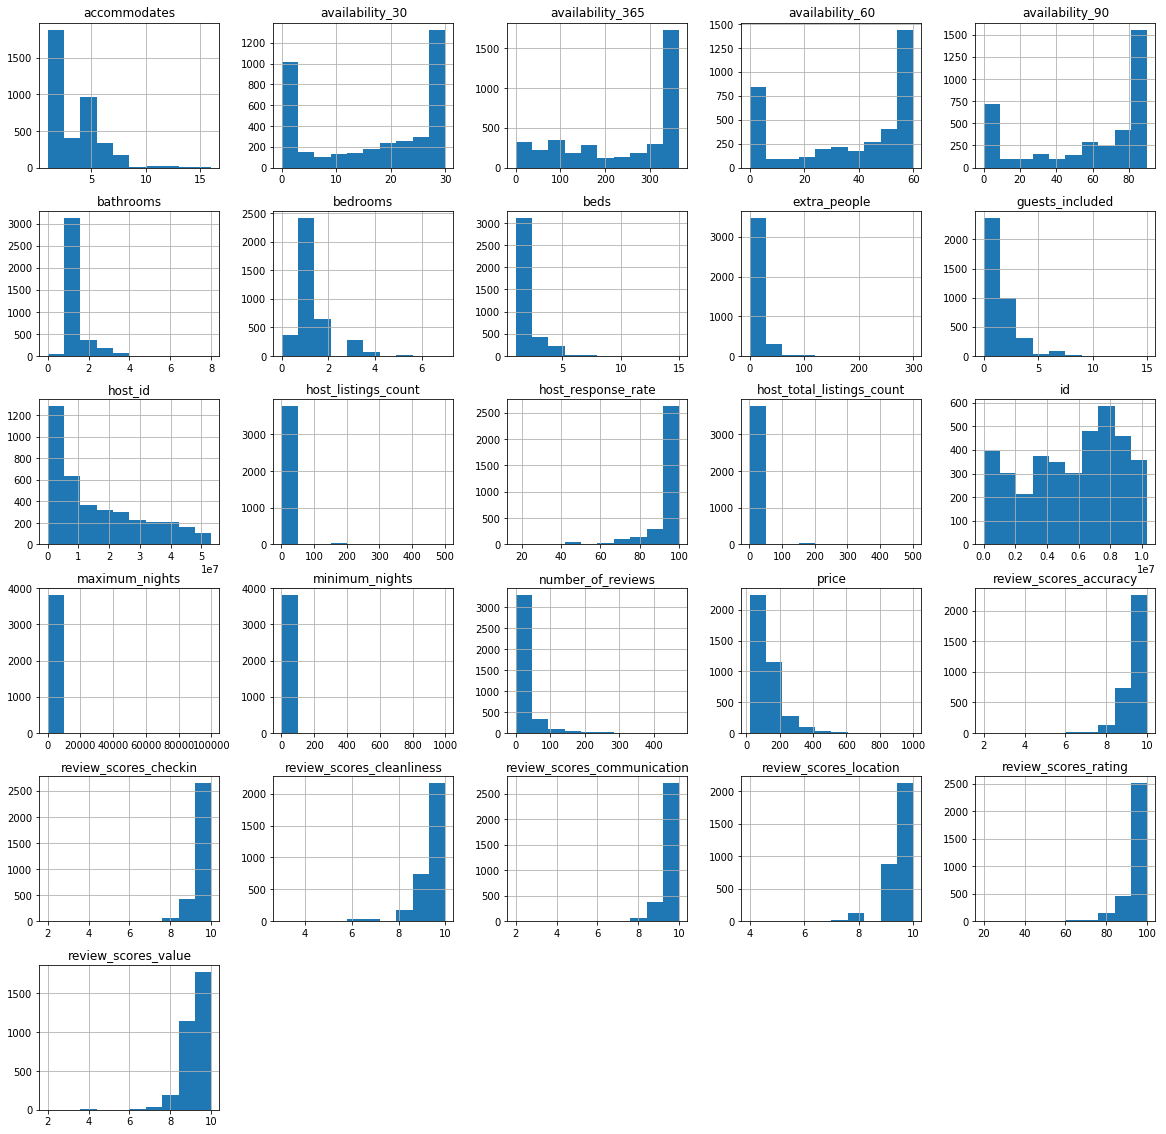

In [16]:
listing_clean.hist(figsize =(20, 20))


1. All the review scores seems to have simaillar distribution pattern.
2. Number of reviews and price  extra people, guests included, beds bathroom seems to be right skewed.
3. Availability 30, 60, and 90 shows simillar distribution.

### 1.C. Correlation matrix to understand the relation of price with other variables

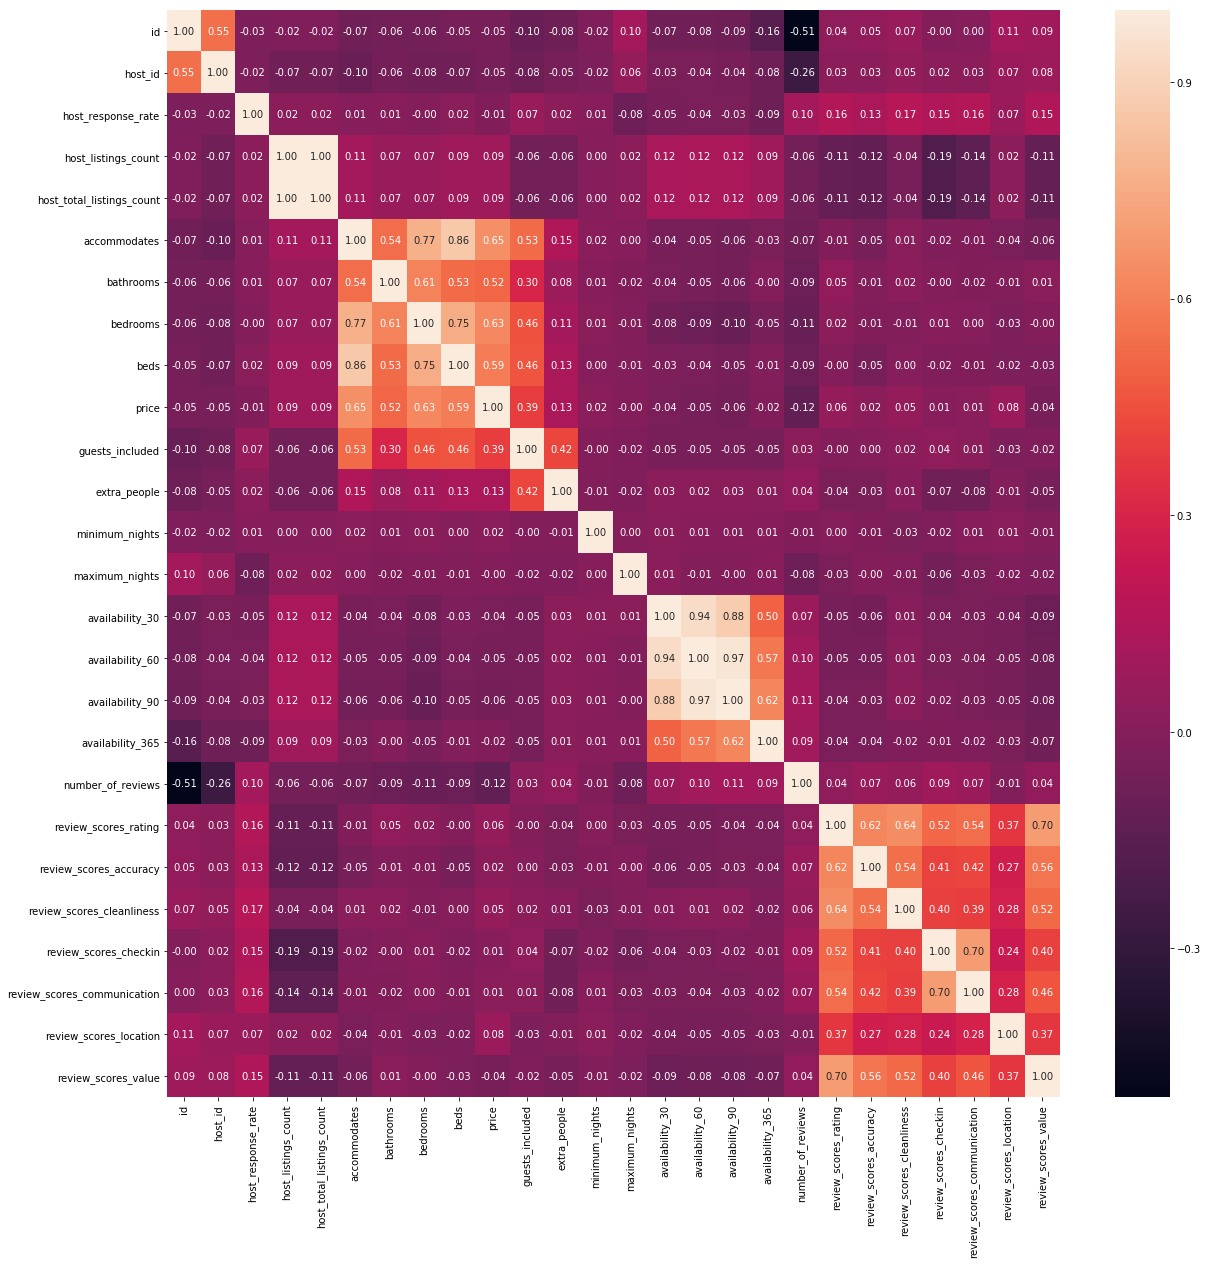

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(listing_clean.corr(),annot=True, fmt='.2f')
plt.show()

#### Observation: Descriptive characteristics of numeric variables and their impact on price

1. Host_listing_count and Host_total_listing_count seems to represent same information with a minimun of 1 and max of 502 and similar distribution. Max value of 502 may rise the doubt of outliers. It is not correalted with the price as well. 


2. Number of people the provided listing accomadates (accomadated), bathrooms, beds, bed rooms, and guest incluedes are highly correlated with the price imposing their impact on price decisions.


3. Minimum and Maximun night seems to have some outliers as per their maximum vlaues provided and the distribution plots. Corrleation matrix does not show any relation between the number of nights and the price.


4. Availability_|30, 60, 90, and 365 does not show any correlation with the price. However there is a strong correltaion among these variables.


5. Simillar correlation and distribution pattern with the review types was obseved with sparse to no carrelation with price.


6. Number of reivews showed a negative correaltion with the price representing properties with high number of reivews has lower price. 


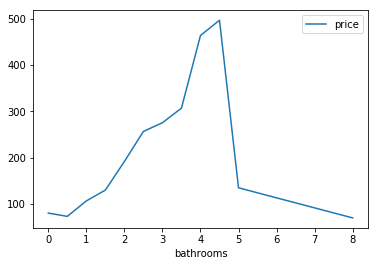

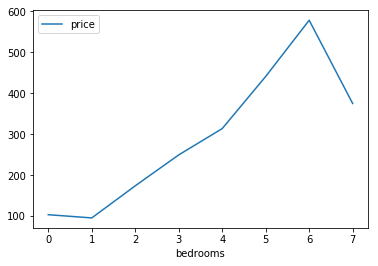

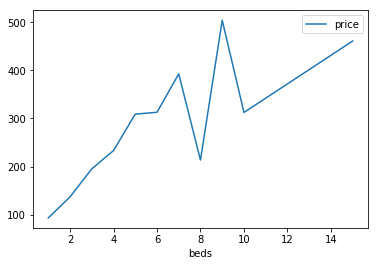

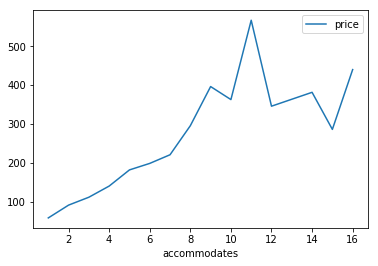

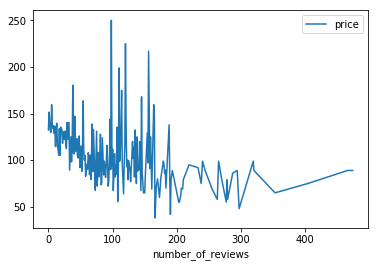

In [34]:
price_var = ['bathrooms','bedrooms', 'beds', 'accommodates','number_of_reviews']

for col1 in price_var:
    price_var_col1 = pd.DataFrame(listing_clean.groupby(col1)['price'].mean(), columns=['price'])
    price_var_col1.plot(kind='line')


#### Further exploration of variables that showed a strong correlation with the price plotted above:

1. As the number of bathrooms increased an increase in price untill 4 bathrooms and a decrease in price with increased number of bathrooms. 

2. A linear relationship of price and bedrooms is obseved however, a lower price was observed with listing that have 7 bedrooms

3. Number of beds and number of people the listing accomates diaplayed a simillar price pattern.


### 1.D. Exploratory Analysis of categorical variables

In [18]:
#listing_clean.columns(dtype=='object')
#listing_clean.select_dtypes('object').columns.tolist()

In [19]:
for i in listing_clean.columns:
      if listing_clean[i].dtype=='object':
            print(listing_clean[i].value_counts())

2013-08-30    51
2013-02-04    39
2011-10-03    37
2011-03-08    37
2012-07-27    35
2010-01-27    33
2015-08-25    23
2015-01-30    21
2013-07-08    20
2013-03-04    14
2011-06-28    13
2011-06-02    12
2012-07-12    12
2012-01-18    12
2014-08-11    11
2011-07-24    11
2015-05-21    11
2013-12-11    10
2009-11-02    10
2015-04-13    10
2014-08-01    10
2014-05-01    10
2014-05-09    10
2013-05-13    10
2012-02-21     9
2013-04-07     9
2015-06-08     9
2015-02-02     9
2015-07-09     9
2014-01-13     9
              ..
2014-02-21     1
2013-04-18     1
2015-03-11     1
2010-06-21     1
2015-11-27     1
2014-02-24     1
2011-07-07     1
2011-11-02     1
2012-10-29     1
2015-01-09     1
2010-09-18     1
2015-04-02     1
2012-01-19     1
2011-09-30     1
2011-09-04     1
2009-12-22     1
2012-10-12     1
2013-11-11     1
2013-09-30     1
2011-05-27     1
2012-10-23     1
2014-11-24     1
2012-04-03     1
2013-12-05     1
2015-01-24     1
2012-08-08     1
2014-01-29     1
2012-06-05    

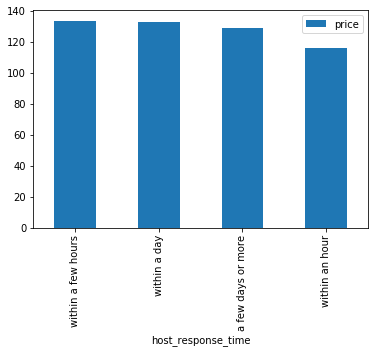

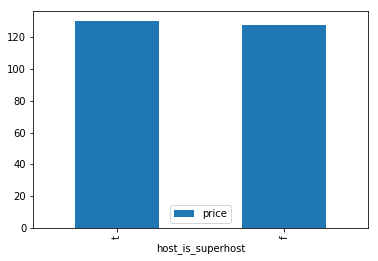

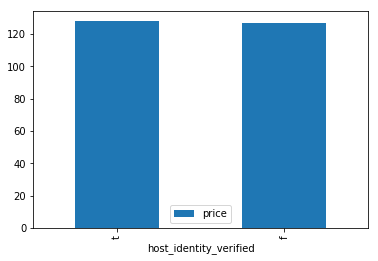

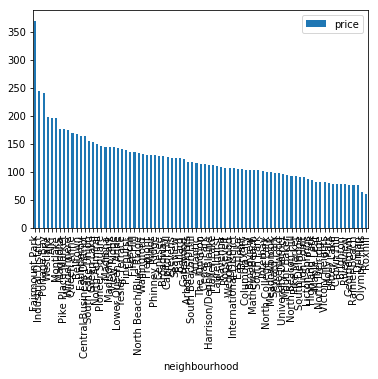

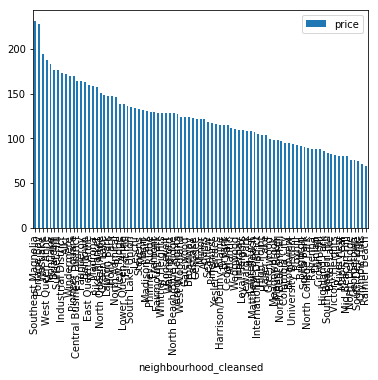

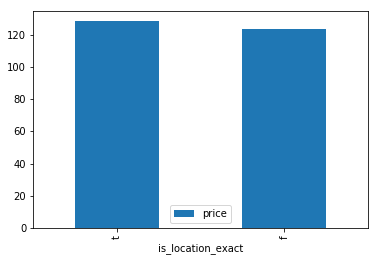

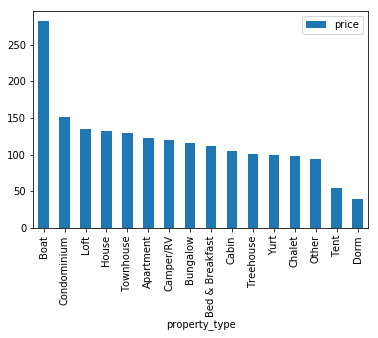

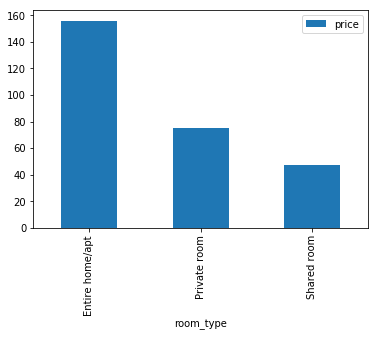

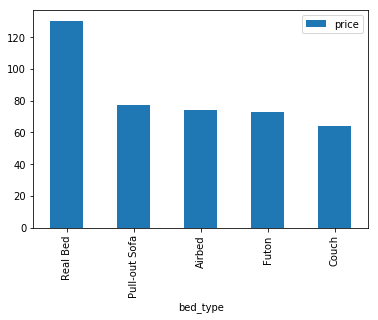

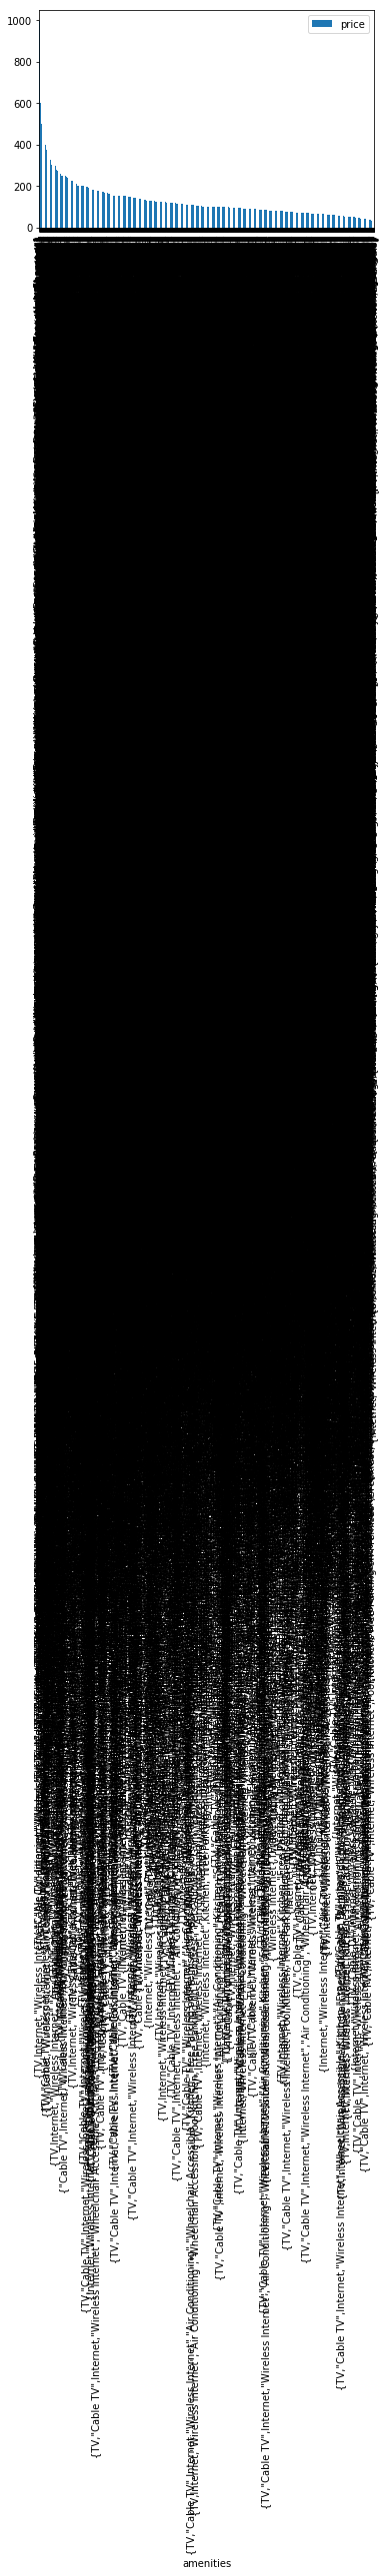

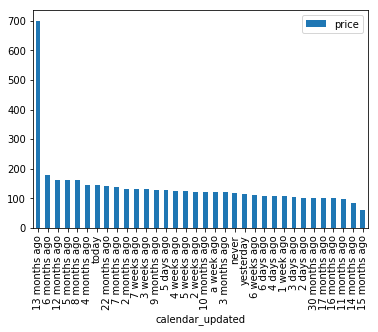

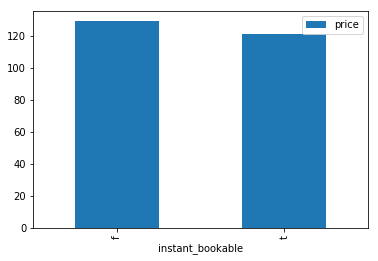

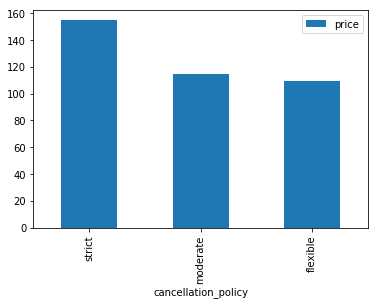

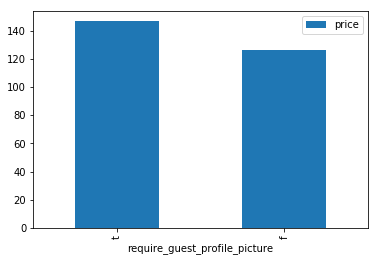

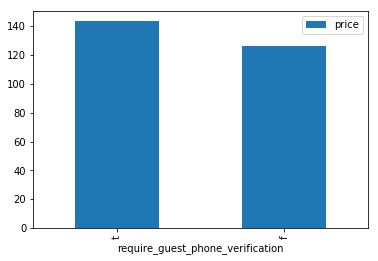

In [22]:
# Plotting it in a bar
cat_vars = ['host_response_time', 'host_is_superhost','host_identity_verified',
 'neighbourhood', 'neighbourhood_cleansed', 'is_location_exact', 'property_type',
 'room_type', 'bed_type', 'amenities', 'calendar_updated', 'instant_bookable',
 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification']

def plots(var):
    for col in var:
        price_by_col = listing_clean.groupby([col])[['price']].mean().sort_values(by='price',ascending=False)
        price_by_col.plot(kind='bar')
        
plots(cat_vars)

#### Observation: Categorical variables that have impact on price
1. Host reponse time: Hosts who responded within an hour has lowest mean price while hosts who responded within few hours or in a day have the highest mean price

2. Locations accuracy has minor impact on the mean price

3. Property - Boat has highest mean price while Dorm has least mean price showing that type of property need to be considered while decding a price of the property

4. Rented room_type  has a logical breakdown in the mean price. Shared rooms has lowest mean price while private rooms have moderate mean price and entire home or apartments have highest mean price. 

6. Bed_type-Couch has lowest mean price and properties that provided real beds showed highest mean price

7. Properties that can be booked showed slightly lower mean price.

8. Properties that has strict cancelation policy has highest mean price while those with flexible cancellation policy has less mean price.

9. Guests who are verified and has profile picture paid more mean price compared to those who didn't provided this information.

10. Southwest Magnolia is the most expensive neighborthood_cleansed while Rainier Beach is the chepeast.

11. Fairmount Park is the most expensive neighborthood while Roxhill is the chepeast.

12. Amenities provided does have impact on price, however, this needs further analysis.


Type of host do not have an impact on the mean price.

# Answer to Question 1:

Bathrooms, Bedrooms, Beds, number of guests the listing can accomodate, and number of reviewes provided by precious guests seems to paly an important role in pricing the listing. Though the extra guest price, avaialbility do not show any correlation with, I believe it should also be considere for the price analysis with some limitations.Other key factors are Host response time, Property type,Rented room type,Type of beds shared,Cancellation Policy, and Guest verification


##  2: What are the popular and least popular neghborhods?

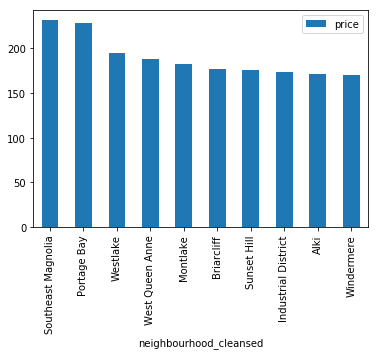

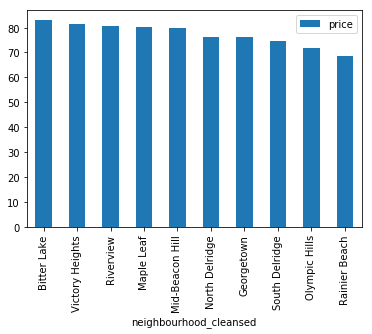

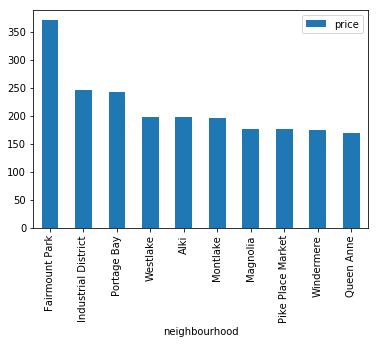

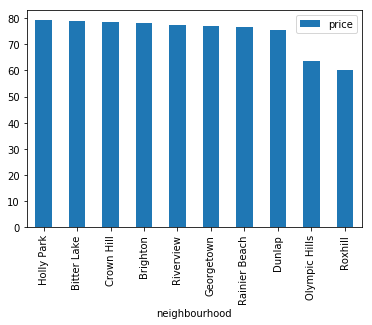

In [381]:
#Mean price change in the neighbourhood_Cleansed

price_by_col = listing_clean.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).head(10)
price_by_col.plot(kind='bar')
    
    
price_by_col = listing_clean.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False).tail(10)
price_by_col.plot(kind='bar')

#Mean price change in the neighbourhood

price_by_col = listing_clean.groupby(['neighbourhood'])[['price']].mean().sort_values(by='price',ascending=False).head(10)
price_by_col.plot(kind='bar')
price_by_col = listing_clean.groupby(['neighbourhood'])[['price']].mean().sort_values(by='price',ascending=False).tail(10)
price_by_col.plot(kind='bar')


In [395]:
len(listing_clean['neighbourhood'].value_counts())

81

# Answer to question 2:

## Popular and chepeast neighborhoods¶
1. Southwest Magnolia is the most expensive neighborhood_cleansed while Rainier Beach is the chepeast.

2. Fairmount Park is the most expensive neighborhood while Roxhill is the chepeast.

Note: Neighborhood and Neighborhood_cleansed has an impact on the proce and the areas seems to be different. A clear understanding these variable need to be known if they represent same like- city-county that mimics dividion -subdivision so that once of these can be chosen for price analysis.

## 3. Is there a sesonal pattern of price and availability of the listings?

#### 3.1 Cleaning calendar data

In [25]:
calender.isnull().sum()/calender.shape[0]*100

listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
dtype: float64

In [26]:
calender['price'] = calender['price'].str.replace('$','').str.replace(',','').astype('float')
calender['available'] = calender['available'].str.replace('t','1').str.replace('f','0').astype('int')

In [27]:
calender['available'].value_counts()

1    934542
0    459028
Name: available, dtype: int64

In [28]:
calender['date'].head(10)

0    2016-01-04
1    2016-01-05
2    2016-01-06
3    2016-01-07
4    2016-01-08
5    2016-01-09
6    2016-01-10
7    2016-01-11
8    2016-01-12
9    2016-01-13
Name: date, dtype: object

### 3.2. Extracting different parts of date to understand the seasonal trends

In [29]:
import datetime as dt
calender['date'] = pd.to_datetime(calender['date'])
calender['month'] =calender['date'].dt.month
calender['day'] =calender['date'].dt.day
calender['year'] =calender['date'].dt.year
calender['weekday'] =calender['date'].dt.weekday

In [30]:
calender[['date','weekday']].head(10)

,date,weekday
0,2016-01-04,0
1,2016-01-05,1
2,2016-01-06,2
3,2016-01-07,3
4,2016-01-08,4
5,2016-01-09,5
6,2016-01-10,6
7,2016-01-11,0
8,2016-01-12,1
9,2016-01-13,2


#### 3.3. Plots to check the trends in price

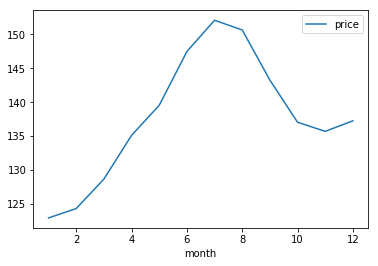

In [31]:
price_by_month = calender.groupby(['month'])[['price']].mean()
price_by_month.plot(kind='line')

#### There is a gradual increase in the price at the start of the year and peaked at the months June to September followed by a decrease towards teh end of the year.

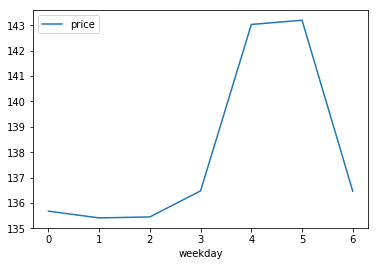

In [32]:
price_by_month = calender.groupby(['weekday'])[['price']].mean()
price_by_month.plot(kind='line')

#### Weekends are the expernsive compared to the weekdays.

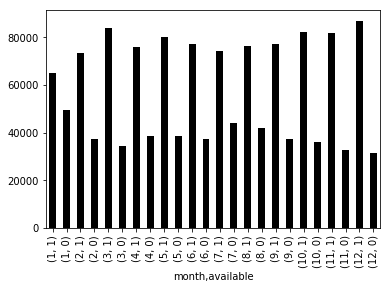

In [33]:
listing_avlb=calender.groupby('month')['available'].value_counts()
listing_avlb.plot(kind='bar', color ='0')
#print("Listings % avaialbility through the year:", round(listing_avlb,0))

#### June, July, and Auguest are the busiest months of the year and March and December appears to be dry seasons.

# Answer to question 3:

1. There is a gradual increase in the price at the start of the year and peaked at the months June to September followed by a decrease towards teh end of the year.

2. Weekends are the expernsive compared to the weekdays.

3. June, July, and Auguest are the busiest months of the year and March and December appears to be dry seasons.

There is a logical breakdown in the price and avialbility. The busiest and expensive months are days are either holiday or summer-season people are likely to travel. The dry months or day are the working days, school year ends, and festivals times when people are likely to stay home or busy.

## Summary of the Analysis:

## 1. What are the key factors that impact the listing price?

Bathrooms, Bedrooms, Beds, number of guests the listing can accomodate, and number of reviewes provided by precious guests seems to paly an important role in pricing the listing. Though the extra guest price, avaialbility do not show any correlation with, I believe it should also be considere for the price analysis with some limitations.Other key factors are Host response time,
Property type,Rented room type,Type of beds shared,Cancellation Policy, and
Guest verification

## 2. What are the popular and least popular neghborhods?

1. Southwest Magnolia is the most expensive neighborhood_cleansed while Rainier Beach is the chepeast.

2. Fairmount Park is the most expensive neighborhood while Roxhill is the chepeast.

Note: Neighborhood and Neighborhood_cleansed has an impact on the proce and the areas seems to be different. A clear understanding these variable need to be known if they represent same like- city-county that mimics dividion -subdivision so that once of these can be chosen for price analysis.


## 3. Is there a sesonal pattern of price and availability of the listings?

1. There is a gradual increase in the price at the start of the year and peaked at the months June to September followed by a decrease towards teh end of the year.

2. Weekends are the expernsive compared to the weekdays.

3. June, July, and Auguest are the busiest months of the year and March and December appears to be dry seasons.

There is a logical breakdown in the price and avialbility. The busiest and expensive months are days are either holiday or summer-season people are likely to travel. The dry months or day are the working days, school year ends, and festivals times when people are likely to stay home or busy.

### Future Work:

Considering these key indicators as predictors of the price. However, futher data cleaning is needed. A few aspect the need to be consideres are 

1. There are a few predictors numeric variables that are highlty corrlated with each other. So, while performing the prediction analysis, these should be taken into consideration and variables of less importance should be dropped to exclude any existing multicolinearity.

2. A few catergorial variables for instance-negihborthood has 81 unique catergoires. While creating dummy variables, this alone will create about 80 variables. A deep analysis and goruping the negiborhoods with some logic- like gorup them by county etc. So, all categorical variables with too many categories should be broken down logically before creating dummy variables.

3. Amenities do have impact on the price. However, this variable need an extensive de-cluttering, identifying which combination of amenities are associated with the high pricing listing.... etc 
